# Creating Pixel Count Baseline Measurements

## Importing all of the needed libraries

In [1]:
import os
from PIL import Image
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

curPlace = os.getcwd()
Place = curPlace + '\data'
placePath = pathlib.Path(Place)
allFiles = list(placePath.iterdir())

## Counting all of the Pixels in each Image

In [2]:
nameList = np.array(['Name'])
totalPixCount = np.array([1,1,1])

for i in allFiles:
    curImage = Image.open(i)
    pathString = str(i)
    ind = pathString.find('Figure')
    length = len(pathString)
    name = pathString[ind:length]
    
    ind = name.find('.')
    name = np.array(name[0:ind])
    nameList = np.vstack((nameList, name))
    
    size = curImage.size
    width = size[0]
    height = size[1]
    pix = curImage.load()
    
    whitePix = 0
    nonWhitePix = 0
    j = 0
    
    while j < width:
        z = 0
        while z < height:
            curPix = pix[j,z]
            
            if (curPix[0] >= 250) & (curPix[1] >= 250) & (curPix[2] >= 250):
                whitePix = whitePix + 1
            else:
                nonWhitePix = nonWhitePix + 1
            z = z + 1
        j = j + 1
    
    pixArr = np.array([whitePix, nonWhitePix, whitePix + nonWhitePix])
    totalPixCount = np.vstack((totalPixCount, pixArr))
    

size = totalPixCount.shape
totalPixCount = totalPixCount[1:size[0],:]
size = nameList.shape
nameList = nameList[1:size[0],:]

## Obtaining the Pixel Percentages

In [3]:
size = totalPixCount.shape
rows = size[0]

i = 0

Percents = np.array([1,1])

while i < rows:
    curImgCount = totalPixCount[i]
    whitePixPercent = curImgCount[0]/curImgCount[2]
    nonWhitePixPercent = curImgCount[1]/curImgCount[2]
    
    curPercents = np.array([whitePixPercent,nonWhitePixPercent])
    Percents = np.vstack((Percents,curPercents))
    
    i = i + 1
    
size = Percents.shape
Percents = Percents[1:size[0],:]

## Creating the Spreadsheets and Figure Outputs Directory if it does not Exist

In [4]:
current_directory = os.getcwd()

# Combine current directory path with the desired directory name
new_directory_path = current_directory + '\\spreadsheets'

# Check if the directory exists
if not os.path.exists(new_directory_path):
    # Create the directory if it doesn't exist
    os.makedirs(new_directory_path)

In [5]:
current_directory = os.getcwd()

# Combine current directory path with the desired directory name
new_directory_path = current_directory + '\\figure outputs'

# Check if the directory exists
if not os.path.exists(new_directory_path):
    # Create the directory if it doesn't exist
    os.makedirs(new_directory_path)

## Sending the Information into an excel file for later user

In [6]:
WhiteData = pd.DataFrame(Percents[:,0], columns = [ "White Pixel Percent"])
NonWhiteData = pd.DataFrame(Percents[:,1], columns = [ "Non-White Pixel Percentage"])
nameData = pd.DataFrame(nameList, columns = ["Figure Number"])
outWhiteData = pd.concat([nameData,WhiteData], axis =1, join = "inner")
outNonWhiteData = pd.concat([nameData, NonWhiteData], axis = 1, join = "inner")
outWhiteData.to_excel(curPlace + '\spreadsheets\WhitePercents.xlsx')
outNonWhiteData.to_excel(curPlace + '\spreadsheets\WhiteNonPercents.xlsx')


## Visualizing all of the White Pixels

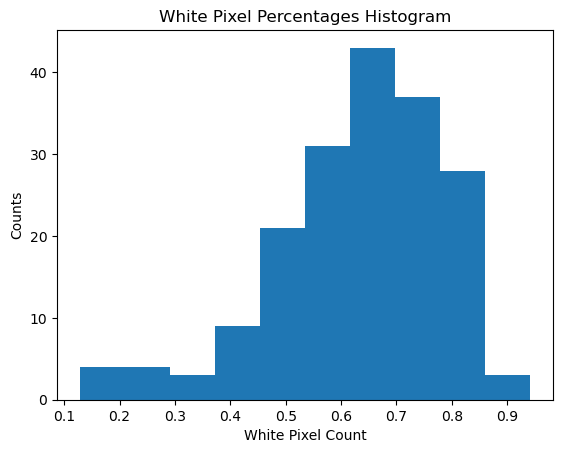

In [7]:
size = Percents.shape
rows = size[0]

WhitePixPercents = Percents[0:rows,0]

plt.hist(WhitePixPercents)
plt.xlabel('White Pixel Count')
plt.ylabel('Counts')
plt.title('White Pixel Percentages Histogram')
plt.savefig(os.getcwd() + '\\figure outputs\\White Pixel Percentages Histogram.png')

## Visualizing all of the non-White Pixels

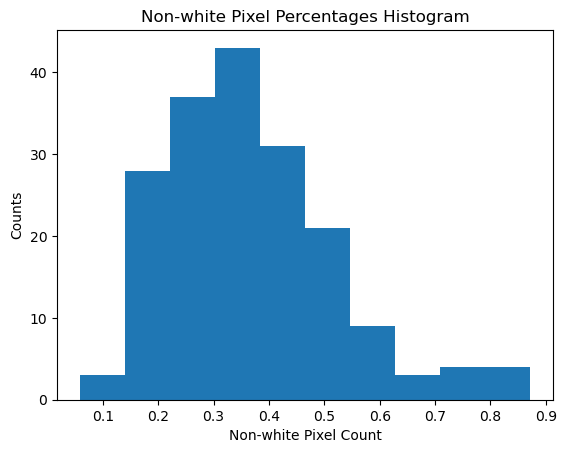

In [8]:
nonWhitePercents = Percents[0:rows,1]

plt.hist(nonWhitePercents)
plt.xlabel('Non-white Pixel Count')
plt.ylabel('Counts')
plt.title('Non-white Pixel Percentages Histogram')
plt.savefig(os.getcwd() + '\\figure outputs\\Non White Pixel Percentages Histogram.png')

## Finding the Image with the Highest Percentage

In [9]:

i = 0
init = 0

size = Percents.shape

while i < size[0]:
    curVal = Percents[i,0]
    
    if curVal >= init:
        init = curVal
        maxidx = i
    i = i + 1


## Finding the Image with the Lowest Percentage

In [10]:

i = 0
init = 1

size = Percents.shape

while i < size[0]:
    curVal = Percents[i,0]
    
    if curVal <= init:
        init = curVal
        minidx = i
    i = i + 1



## Showing the Images together

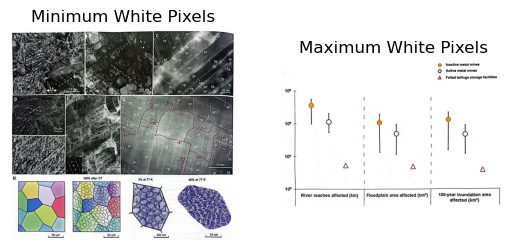

In [11]:
minImgPath = str(allFiles[minidx])
maxImgPath = str(allFiles[maxidx])

minImg = cv2.imread(minImgPath)
minImg = cv2.cvtColor(minImg, cv2.COLOR_BGR2RGB)
maxImg = cv2.imread(maxImgPath)
maxImg = cv2.cvtColor(maxImg, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.imshow(minImg)
plt.title('Minimum White Pixels')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(maxImg)
plt.title('Maximum White Pixels')
plt.axis('off')
plt.savefig(os.getcwd() + '\\figure outputs\\Min and Max White Pixels.png')

## Showing what the Algorithm Considered "White Space"

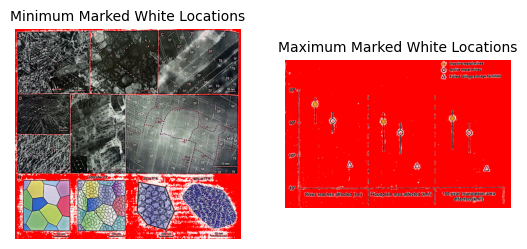

In [12]:

curImage = cv2.imread(minImgPath)
curImage = cv2.cvtColor(curImage, cv2.COLOR_BGR2RGB)
    
size = curImage.shape
width = size[0]
height = size[1]
pix = curImage
    
whitePix = 0
nonWhitePix = 0
j = 0
    
while j < width:
    z = 0
    while z < height:
        curPix = pix[j,z]
            
        if (curPix[0] >= 250) & (curPix[1] >= 250) & (curPix[2] >= 250):
            pix[j,z] = (255,0,0)

        z = z + 1
    j = j + 1

curImage = cv2.imread(maxImgPath)
curImage = cv2.cvtColor(curImage, cv2.COLOR_BGR2RGB)
    
size = curImage.shape
width = size[0]
height = size[1]
pix2 = curImage
    
whitePix = 0
nonWhitePix = 0
j = 0
    
while j < width:
    z = 0
    while z < height:
        curPix = pix2[j,z]
            
        if (curPix[0] >= 250) & (curPix[1] >= 250) & (curPix[2] >= 250):
            pix2[j,z] = (255,0,0)

        z = z + 1
    j = j + 1    

plt.subplot(1,2,1)
plt.imshow(pix)
plt.title('Minimum Marked White Locations', fontsize = 10)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(pix2)
plt.title('Maximum Marked White Locations', fontsize = 10)
plt.axis('off')
plt.savefig(os.getcwd() + '\\figure outputs\\Marked White Pixel Locations.png')